In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import scipy.stats as stats

from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit # при кросс-валидации случайно перемешиваем данные
# альтернативно можно использовать StratifiedKFold т.к. задача классификации
import seaborn as sns # чтобы подкрасить таблички

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer


import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 100)


In [ ]:
from chardet.universaldetector import UniversalDetector # Импортируем субмодуль chardet.universaldetector
detector = UniversalDetector()
with open('train.csv', 'rb') as fh:
    for line in fh:
        detector.feed(line)
        if detector.done:
            break
detector.close()

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [ ]:
df = pd.read_csv('train.csv',encoding='ascii')
df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [ ]:
display(df.shape)
df.info()


(1460, 81)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

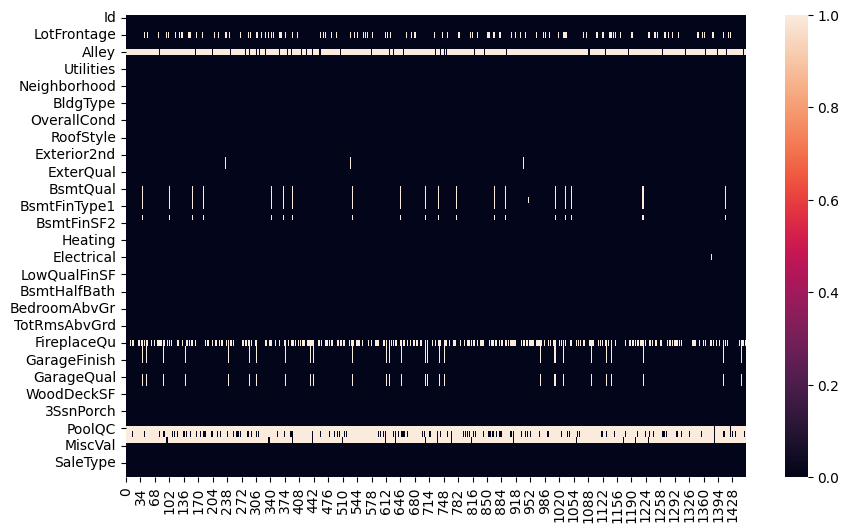

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose());

In [ ]:
def nan_values_handle(data):
  print("missing_values")
  print("data_shape :" ,data.shape)
  percent_missing = df.isnull().sum() * 100 / len(data)
  missing_value_df = pd.DataFrame({'column_name': data.columns,
                                 'percent_missing': percent_missing})
  display(missing_value_df.sort_values(ascending=False,by="percent_missing")[:10])

  print("drop_cols_with_more_then_nan_values_0.25%")
  missing_data_high=missing_value_df["percent_missing"]>0.25
  display(missing_data_high[missing_data_high==True].index)

  drop_cols=missing_data_high[missing_data_high==True].index
  data.drop(drop_cols,axis=1,inplace=True)
  display(data.shape)
  return data



In [ ]:
df=nan_values_handle(df)

missing_values
data_shape : (1460, 81)


,column_name,percent_missing
PoolQC,PoolQC,99.520548
MiscFeature,MiscFeature,96.301370
Alley,Alley,93.767123
Fence,Fence,80.753425
FireplaceQu,FireplaceQu,47.260274
LotFrontage,LotFrontage,17.739726
GarageYrBlt,GarageYrBlt,5.547945
GarageCond,GarageCond,5.547945
GarageType,GarageType,5.547945
GarageFinish,GarageFinish,5.547945


drop_cols_with_more_then_nan_values_0.25%


Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'],
      dtype='object')

(1460, 63)

In [ ]:

def filling_missing_values(data):
  num_cols =data.select_dtypes(include=np.number).columns
  cat_cols = data.columns[data.dtypes == 'object']
  print(print("size_of_num_and_cat_cols" ), len(num_cols),len(cat_cols))
  percent_missing = data.isnull().sum() * 100 / len(data)
  missing_value_df = pd.DataFrame({'column_name': data.columns,
                                 'percent_missing': percent_missing})
  #print("cat_cols_missing_percentage")
  #display(missing_value_df.loc[cat_cols].sort_values(ascending=False,by="percent_missing")[:10])

  miss_cat=missing_value_df.loc[cat_cols][percent_missing!=0]
  miss_num=missing_value_df.loc[num_cols][percent_missing!=0]
  print("filling_columns_cat")
  display(miss_cat)
  print("filling_columns_num")
  display(miss_num)
  #strategy_for_categorial_feature
  imputer = SimpleImputer(strategy='most_frequent',missing_values=np.nan)
  data[miss_cat.index]=imputer.fit_transform(data[miss_cat.index])

  #strategy_for_numerical_feature
  imputer=KNNImputer(n_neighbors=5)
  data[num_cols]=imputer.fit_transform(data[num_cols])
  return data

In [ ]:
df=filling_missing_values(df)

size_of_num_and_cat_cols
None 35 28
filling_columns_cat


,column_name,percent_missing
Electrical,Electrical,0.068493


filling_columns_num


,column_name,percent_missing


In [ ]:

num_cols =df.select_dtypes(include=np.number).columns
cat_cols = df.columns[df.dtypes == 'object']

print(f"We have {len(num_cols)} numeric columns: {', '.join(num_cols)}")
print(f"And {len(cat_cols)} categorical columns: {', '.join(cat_cols)}")

We have 35 numeric columns: Id, MSSubClass, LotArea, OverallQual, OverallCond, YearBuilt, YearRemodAdd, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SalePrice
And 28 categorical columns: MSZoning, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, ExterQual, ExterCond, Foundation, Heating, HeatingQC, CentralAir, Electrical, KitchenQual, Functional, PavedDrive, SaleType, SaleCondition


In [ ]:

new_df=df[num_cols]
#new_df["target"]=df["SalesPrice"]
corr_df=pd.DataFrame(new_df.corr()["SalePrice"].sort_values(ascending=False)[:15])
corr_df.style.background_gradient(cmap='Blues')

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


In [ ]:
high_corr=corr_df["SalePrice"]>0.5
display(high_corr[high_corr==True].index)
display(high_corr[high_corr==True].index.shape)

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')

(11,)

In [ ]:
new_num_cols=list(high_corr[high_corr==True].index)
new_num_cols.remove("SalePrice")

In [ ]:
from scipy.stats import norm, skew
import scipy.stats as stats
def diagnostic_plots(df, variable):
    plt.figure(figsize=(5,2))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

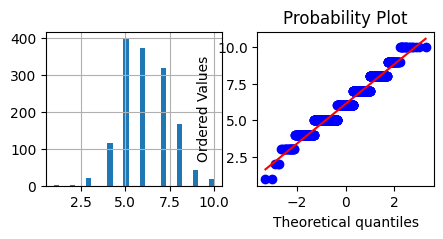

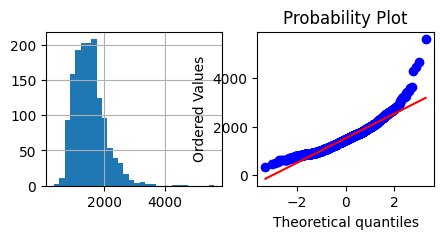

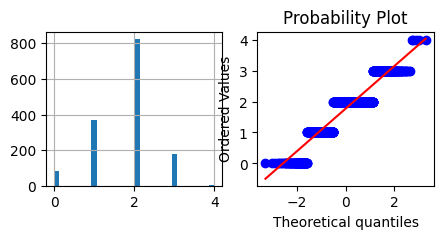

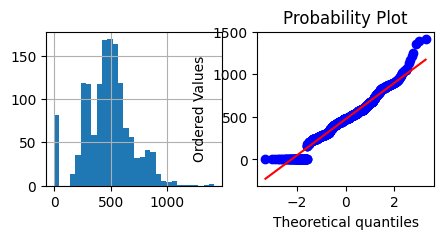

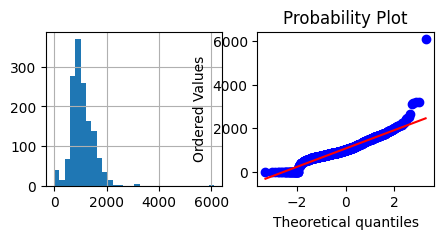

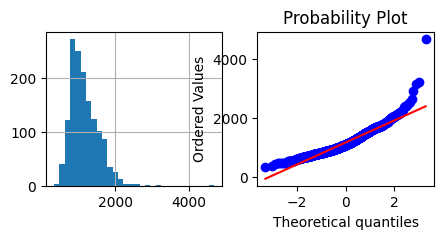

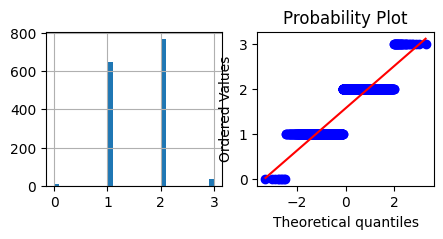

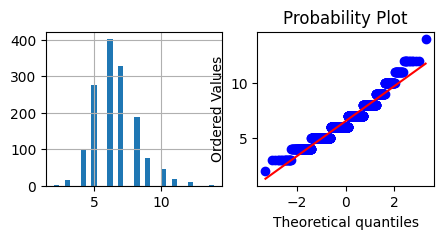

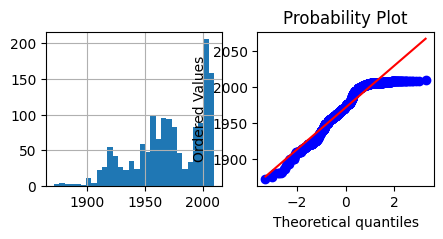

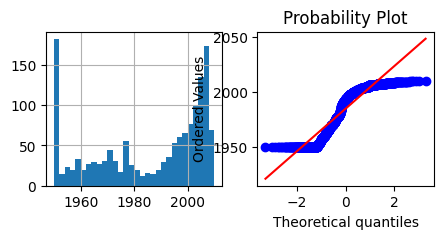

In [ ]:
for column in df[new_num_cols]:
  diagnostic_plots(df,column)

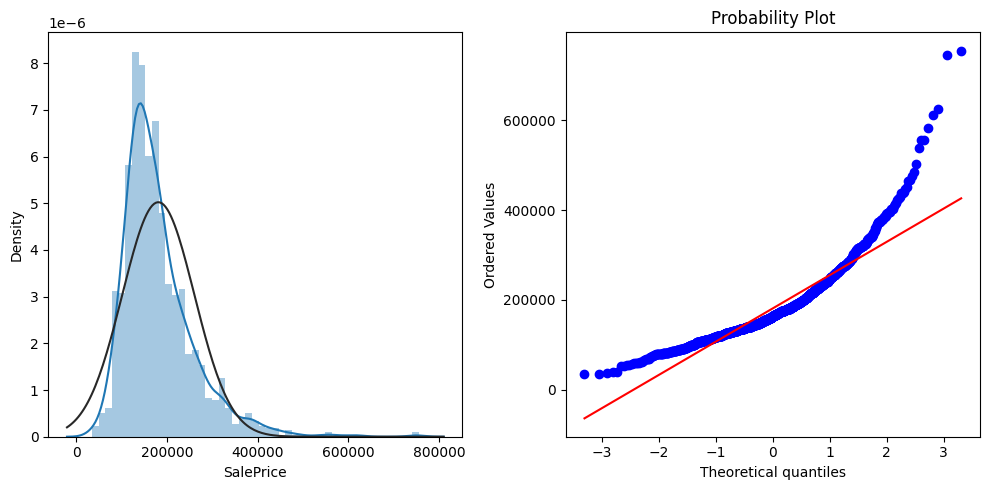

mu: 180921.196, sigma: 79415.292


In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))

sns.distplot(df['SalePrice'], fit = norm, ax = ax[0])
stats.probplot(df['SalePrice'], plot = plt)

plt.tight_layout()
plt.show()
mu, sigma = norm.fit(df['SalePrice'])
print("mu: {:.3f}, sigma: {:.3f}".format(mu, sigma))

In [ ]:
joined_list = [*new_num_cols, *cat_cols]  # unpack both iterables in a list literal
print(joined_list)

['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']


In [ ]:
X = df[joined_list]
y = df["SalePrice"]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)


Training Features Shape: (1168, 38)
Training Labels Shape: (1168,)
Testing Features Shape: (292, 38)
Testing Labels Shape: (292,)


In [ ]:
numerical_transformer = Pipeline([('scaler', StandardScaler())])

ct = ColumnTransformer([('num_transformer', numerical_transformer, new_num_cols),
                          ('encoder',OneHotEncoder(handle_unknown = 'ignore'), cat_cols)
                         ])
pipeline=Pipeline([('column_transformer', ct)])


In [ ]:
X_train = pipeline.fit_transform(X_train) # потом преобразуем  transform
X_test  = pipeline.transform(X_test) # для тестовых - просто transform

In [ ]:
def regression_report(y_test,y_predict):
    print('Ошибка на тестовых данных')
    print('MAE: %.1f' % mean_absolute_error(y_test,y_predict))
    print('RMSE: %.1f' % mean_squared_error(y_test,y_predict,squared=False))

    print('R2 : %.4f' %  r2_score(y_test,y_predict))


In [ ]:
model=LinearRegression()
model.fit(X_train,y_train)
predict=model.predict(X_test)
regression_report(y_test,predict)

Ошибка на тестовых данных
MAE: 21574.1
RMSE: 32684.4
R2 : 0.8607


ISOLATIONFORSET

In [ ]:
from sklearn.ensemble import IsolationForest
# identify outliers in the training dataset
iso = IsolationForest(contamination=0.05)
yhat = iso.fit_predict(X_train)

In [ ]:
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]

In [ ]:
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions

(1109, 195) (1109,)


In [ ]:
regression_report(y_test,yhat)

Ошибка на тестовых данных
MAE: 21419.9
RMSE: 33339.5
R2 : 0.8551


In [ ]:
n_estimators =np.arange(1,100,3)
contamination=np.arange(0,0.5,0.05)


In [ ]:
# Create the random grid
param_grid = {'n_estimators': n_estimators,
               "contamination":contamination}


In [ ]:
def scorer_f(estimator, X):   #your own scorer
      return np.mean(estimator.score_samples(X))

isolation_forest = GridSearchCV(IsolationForest(random_state=42), param_grid,scoring=scorer_f)


In [ ]:
model = isolation_forest.fit(X_train)
outlier_df=pd.DataFrame()
outlier_df['outliers'] = model.predict(X_train)


In [ ]:
print(model.best_params_)

{'contamination': 0.05, 'n_estimators': 13}


In [ ]:
mask = model.predict(X_train) != -1
X_train, y_train = X_train[mask, :], y_train[mask]

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
regression_report(y_test,yhat)

Ошибка на тестовых данных
MAE: 21511.4
RMSE: 33602.0
R2 : 0.8528


One-Class SVM

In [ ]:
# identify outliers in the training dataset
from sklearn.svm import OneClassSVM
ee = OneClassSVM(nu=0.01)
yhat = ee.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)

(1031, 195) (1031,)


In [ ]:
# evaluate predictions
regression_report(y_test,yhat)

Ошибка на тестовых данных
MAE: 20325.5
RMSE: 33020.0
R2 : 0.8579


Minimum Covariance Determinant

Если входные переменные имеют гауссово распределение, то для обнаружения выбросов можно использовать простые статистические методы.

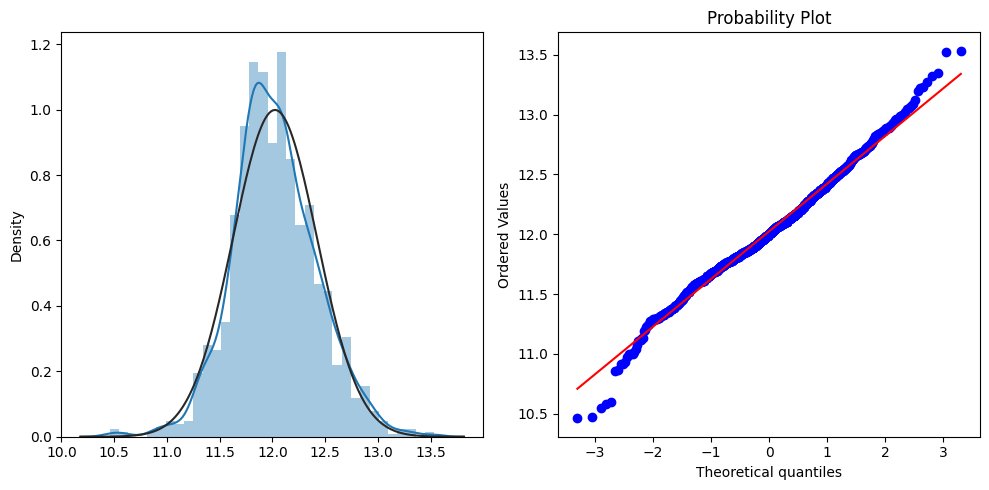

mu: 12.024, sigma: 0.399


In [ ]:

# apply log-transformation

y= np.log1p(y.values)

fig, ax = plt.subplots(1, 2, figsize = (10, 5))

sns.distplot(y, fit = norm, ax = ax[0])
stats.probplot(y, plot = plt)

plt.tight_layout()
plt.show()

mu, sigma = norm.fit(y)
print("mu: {:.3f}, sigma: {:.3f}".format(mu, sigma))


In [ ]:
#добовляем только  PowerTransformer()
numerical_pipe = Pipeline([
    ('power', PowerTransformer()),
    ('scaler', StandardScaler()),
])
categorical_pipe = Pipeline([
    ('encoder', OneHotEncoder( handle_unknown='ignore'))
])
preprocessors_ = ColumnTransformer(transformers=[
    ('num', numerical_pipe, new_num_cols),
    ('cat', categorical_pipe, cat_cols)
])
pipe = Pipeline([
    ('preprocessors', preprocessors_),
])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train = pipe.fit_transform(X_train) # потом преобразуем  transform
X_test  = pipe.transform(X_test) # для тестовых - просто transform

In [ ]:
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
regression_report(y_test,yhat)

Ошибка на тестовых данных
MAE: 0.1
RMSE: 0.1
R2 : 0.8943


In [ ]:
from sklearn.covariance import EllipticEnvelope
ee_1 = EllipticEnvelope(contamination=0.01)
yhat = ee.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)

(1137, 195) (1137,)


In [ ]:
# evaluate predictions
regression_report(y_test,yhat)

Ошибка на тестовых данных
MAE: 0.1
RMSE: 0.1
R2 : 0.8985


r2_score улучшилoсь

R2 : 0.8943 (powertrasform)--->R2 : 0.8985(powertransform+EllipticEnvelope)

 Filter Method((

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
RMSE:  0.14047262218826087
Variance score: 0.89


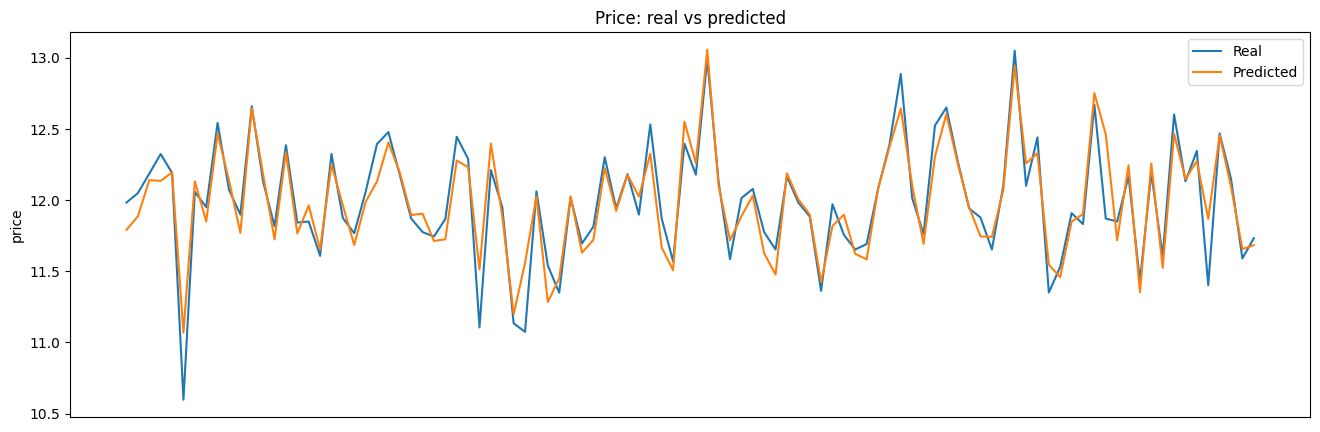

In [ ]:
A = np.array(y_test).reshape(-1, 1)
B = yhat.reshape(-1, 1)
print(type(yhat))
print(type(y_test))
plt.rcParams['figure.figsize'] = 16,5
plt.figure()
plt.plot(A[-100:], label="Real")
plt.plot(B[-100:], label="Predicted")
plt.legend()
plt.title("Price: real vs predicted")
plt.ylabel("price")
plt.xticks(())
rmse = np.sqrt(mean_squared_error(y_test, yhat))

print('RMSE: ',rmse)

print('Variance score: %.2f' % r2_score(y_test, yhat))
plt.show()